In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

 # Code for all 7 tables combination goes below: 

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
# import fancyimpute as fi

In [3]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [4]:
app_train = pd.read_csv('application_train.csv')
print(app_train.shape)
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
app_train['DAYS_EMPLOYED_PERC'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['INCOME_CREDIT_PERC'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_CREDIT']
app_train['INCOME_PER_PERSON'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_FAM_MEMBERS']
app_train['ANNUITY_INCOME_PERC'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['PAYMENT_RATE'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']

print(app_train.shape)


(307511, 122)
(307511, 127)


In [5]:
app_train.isna().sum().sum()

9263239

In [6]:
# app_train=fi.MICE().complete(app_train)

In [9]:
# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute

In [10]:
app_train['CODE_GENDER'].isna().sum()

0

In [11]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [12]:
app_train=app_train[app_train['CODE_GENDER']!='XNA']

In [13]:
app_train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [14]:
# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        app_train[bin_feature], uniques = pd.factorize(app_train[bin_feature])

In [15]:
app_train['CODE_GENDER'].head()

0    0
1    1
2    0
3    1
4    0
Name: CODE_GENDER, dtype: int64

In [16]:
app_train.shape

(307507, 127)

In [17]:
app_train,cat_cols=one_hot_encoder(app_train,nan_as_category=True)

In [18]:
app_train.shape

(307507, 260)

In [19]:
app_train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,100002,1,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,1,0,0,1,0,0
1,100003,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,1,0,0
2,100004,0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,1,0,0,1
3,100006,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,1,0,0,1
4,100007,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
# # NaN values for DAYS_EMPLOYED: 365.243 -> nan
# app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
# # Some simple new features (percentages)
# app_train['DAYS_EMPLOYED_PERC'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
# app_train['INCOME_CREDIT_PERC'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_CREDIT']
# app_train['INCOME_PER_PERSON'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_FAM_MEMBERS']
# app_train['ANNUITY_INCOME_PERC'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
# app_train['PAYMENT_RATE'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']


In [21]:
app_train.shape

(307507, 260)

# Bureau.csv and bureau_balance.csv file merging into one dataframe

In [22]:
bureau = pd.read_csv('bureau.csv')

In [23]:
bb = pd.read_csv('bureau_balance.csv')

In [24]:
bureau.shape

(1716428, 17)

In [25]:
bb.shape

(27299925, 3)

In [26]:
bb, bb_cat = one_hot_encoder(bb, nan_as_category=True)
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category=True)

In [27]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bb.shape

(27299925, 11)

In [29]:
bureau.shape

(1716428, 40)

In [30]:
bb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,STATUS_nan
0,5715448,0,0,0,0,0,0,0,1,0,0
1,5715448,-1,0,0,0,0,0,0,1,0,0
2,5715448,-2,0,0,0,0,0,0,1,0,0
3,5715448,-3,0,0,0,0,0,0,1,0,0
4,5715448,-4,0,0,0,0,0,0,1,0,0


In [31]:
# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
for col in bb.columns:
    bb_aggregations[col] = ['mean']
bb_aggregations

{'MONTHS_BALANCE': ['mean'],
 'SK_ID_BUREAU': ['mean'],
 'STATUS_0': ['mean'],
 'STATUS_1': ['mean'],
 'STATUS_2': ['mean'],
 'STATUS_3': ['mean'],
 'STATUS_4': ['mean'],
 'STATUS_5': ['mean'],
 'STATUS_C': ['mean'],
 'STATUS_X': ['mean'],
 'STATUS_nan': ['mean']}

In [32]:
bb_agg=bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)

In [33]:
bb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,STATUS_nan
0,5715448,0,0,0,0,0,0,0,1,0,0
1,5715448,-1,0,0,0,0,0,0,1,0,0
2,5715448,-2,0,0,0,0,0,0,1,0,0
3,5715448,-3,0,0,0,0,0,0,1,0,0
4,5715448,-4,0,0,0,0,0,0,1,0,0


In [34]:
bb_agg.head()

,MONTHS_BALANCE,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,STATUS_nan
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
SK_ID_BUREAU,,,,,,,,,,,
5001709,-48.0,5001709,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,0
5001710,-41.0,5001710,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,0
5001711,-1.5,5001711,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0
5001712,-9.0,5001712,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,0
5001713,-10.5,5001713,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0


In [35]:
bb[bb['SK_ID_BUREAU']==5001709].sum()/(bb['SK_ID_BUREAU']==5001709).sum()

SK_ID_BUREAU      5.001709e+06
MONTHS_BALANCE   -4.800000e+01
STATUS_0          0.000000e+00
STATUS_1          0.000000e+00
STATUS_2          0.000000e+00
STATUS_3          0.000000e+00
STATUS_4          0.000000e+00
STATUS_5          0.000000e+00
STATUS_C          8.865979e-01
STATUS_X          1.134021e-01
STATUS_nan        0.000000e+00
dtype: float64

In [36]:
bb_agg.shape

(817395, 11)

In [37]:
bureau.shape

(1716428, 40)

In [38]:
bb_agg.columns

MultiIndex(levels=[['MONTHS_BALANCE', 'SK_ID_BUREAU', 'STATUS_0', 'STATUS_1', 'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X', 'STATUS_nan'], ['mean']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [39]:
bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
del bb,bb_agg
# just to save jupyter memory we will delete them
    

In [40]:
bureau.shape

(1716428, 50)

In [41]:

bureau.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,SK_ID_BUREAU_MEAN,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_nan_MEAN
0,215354,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
#     'MONTHS_BALANCE_MIN': ['min'],
#     'MONTHS_BALANCE_MAX': ['max'],
#     'MONTHS_BALANCE_SIZE': ['mean', 'sum']
}

In [43]:
# Bureau and bureau_balance categorical features
cat_aggregations = {}
for cat in bureau_cat: cat_aggregations[cat] = ['mean']
for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']

In [44]:
cat_aggregations

{'CREDIT_ACTIVE_Active': ['mean'],
 'CREDIT_ACTIVE_Bad debt': ['mean'],
 'CREDIT_ACTIVE_Closed': ['mean'],
 'CREDIT_ACTIVE_Sold': ['mean'],
 'CREDIT_ACTIVE_nan': ['mean'],
 'CREDIT_CURRENCY_currency 1': ['mean'],
 'CREDIT_CURRENCY_currency 2': ['mean'],
 'CREDIT_CURRENCY_currency 3': ['mean'],
 'CREDIT_CURRENCY_currency 4': ['mean'],
 'CREDIT_CURRENCY_nan': ['mean'],
 'CREDIT_TYPE_Another type of loan': ['mean'],
 'CREDIT_TYPE_Car loan': ['mean'],
 'CREDIT_TYPE_Cash loan (non-earmarked)': ['mean'],
 'CREDIT_TYPE_Consumer credit': ['mean'],
 'CREDIT_TYPE_Credit card': ['mean'],
 'CREDIT_TYPE_Interbank credit': ['mean'],
 'CREDIT_TYPE_Loan for business development': ['mean'],
 'CREDIT_TYPE_Loan for purchase of shares (margin lending)': ['mean'],
 'CREDIT_TYPE_Loan for the purchase of equipment': ['mean'],
 'CREDIT_TYPE_Loan for working capital replenishment': ['mean'],
 'CREDIT_TYPE_Microloan': ['mean'],
 'CREDIT_TYPE_Mobile operator loan': ['mean'],
 'CREDIT_TYPE_Mortgage': ['mean'],
 '

In [45]:
bureau.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,SK_ID_BUREAU_MEAN,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_nan_MEAN
0,215354,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:

bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})

In [47]:
bureau_agg.head()

DAYS_CREDIT                                  DAYS_CREDIT_ENDDATE  \
                   min  max         mean            var                 min   
SK_ID_CURR                                                                    
100001           -1572  -49  -735.000000  240043.666667             -1329.0   
100002           -1437 -103  -874.000000  186150.000000             -1072.0   
100003           -2586 -606 -1400.750000  827783.583333             -2434.0   
100004           -1326 -408  -867.000000  421362.000000              -595.0   
100005            -373  -62  -190.666667   26340.333333              -128.0   

                               DAYS_CREDIT_UPDATE CREDIT_DAY_OVERDUE       \
               max        mean               mean                max mean   
SK_ID_CURR                                                                  
100001      1778.0   82.428571         -93.142857                  0  0.0   
100002       780.0 -349.000000        -499.875000                  0  0.0   
100003      1216.0 -544.500000        -816.000000                  0  0.0   
100004      -382.0 -488.500000        -532.000000                  0  0.0   
100005      1324.0  439.333333         -54.333333                  0  0.0   

                 ...       CREDIT_TYPE_nan STATUS_0_MEAN STATUS_1_MEAN  \
                 ...                  mean          mean          mean   
SK_ID_CURR       ...                                                     
100001           ...                     0      0.336651      0.007519   
100002           ...                     0      0.406960      0.255682   
100003           ...                     0           NaN           NaN   
100004           ...                     0           NaN           NaN   
100005           ...                     0      0.735043      0.000000   

           STATUS_2_MEAN STATUS_3_MEAN STATUS_4_MEAN STATUS_5_MEAN  \
                    mean          mean          mean          mean   
SK_ID_CURR                                                           
100001               0.0           0.0           0.0           0.0   
100002               0.0           0.0           0.0           0.0   
100003               NaN           NaN           NaN           NaN   
100004               NaN           NaN           NaN           NaN   
100005               0.0           0.0           0.0           0.0   

           STATUS_C_MEAN STATUS_X_MEAN STATUS_nan_MEAN  
                    mean          mean            mean  
SK_ID_CURR                                              
100001          0.441240      0.214590             0.0  
100002          0.175426      0.161932             0.0  
100003               NaN           NaN             NaN  
100004               NaN           NaN             NaN  
100005          0.128205      0.136752             0.0  

[5 rows x 58 columns]

In [48]:
bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

In [49]:
bureau_agg.head()

,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,...,BURO_CREDIT_TYPE_nan_MEAN,BURO_STATUS_0_MEAN_MEAN,BURO_STATUS_1_MEAN_MEAN,BURO_STATUS_2_MEAN_MEAN,BURO_STATUS_3_MEAN_MEAN,BURO_STATUS_4_MEAN_MEAN,BURO_STATUS_5_MEAN_MEAN,BURO_STATUS_C_MEAN_MEAN,BURO_STATUS_X_MEAN_MEAN,BURO_STATUS_nan_MEAN_MEAN
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,0,0.336651,0.007519,0.0,0.0,0.0,0.0,0.441240,0.214590,0.0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,0,0.406960,0.255682,0.0,0.0,0.0,0.0,0.175426,0.161932,0.0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0,0.0,...,0,0.735043,0.000000,0.0,0.0,0.0,0.0,0.128205,0.136752,0.0


In [50]:
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]

In [51]:
active.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,SK_ID_BUREAU_MEAN,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_nan_MEAN
1,215354,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,215354,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.head()

DAYS_CREDIT                                 DAYS_CREDIT_ENDDATE  \
                   min  max        mean            var                 min   
SK_ID_CURR                                                                   
100001            -559  -49 -309.333333   65110.333333               411.0   
100002           -1042 -103 -572.500000  440860.500000               780.0   
100003            -606 -606 -606.000000            NaN              1216.0   
100005            -137  -62  -99.500000    2812.500000               122.0   
100008             -78  -78  -78.000000            NaN               471.0   

                                DAYS_CREDIT_UPDATE CREDIT_DAY_OVERDUE       \
               max         mean               mean                max mean   
SK_ID_CURR                                                                   
100001      1778.0  1030.333333         -10.666667                  0  0.0   
100002       780.0   780.000000         -15.500000                  0  0.0   
100003      1216.0  1216.000000         -43.000000                  0  0.0   
100005      1324.0   723.000000         -21.000000                  0  0.0   
100008       471.0   471.000000         -16.000000                  0  0.0   

                  ...         AMT_CREDIT_SUM AMT_CREDIT_SUM_DEBT             \
                  ...                    sum                 max       mean   
SK_ID_CURR        ...                                                         
100001            ...             884025.000            373239.0  198895.50   
100002            ...             481988.565            245781.0  122890.50   
100003            ...             810000.000                 0.0       0.00   
100005            ...             598626.000            543087.0  284204.25   
100008            ...             267606.000            240057.0  240057.00   

                     AMT_CREDIT_SUM_OVERDUE AMT_CREDIT_SUM_LIMIT              \
                 sum                   mean                 mean         sum   
SK_ID_CURR                                                                     
100001      596686.5                    0.0               0.0000       0.000   
100002      245781.0                    0.0           15994.2825   31988.565   
100003           0.0                    0.0          810000.0000  810000.000   
100005      568408.5                    0.0               0.0000       0.000   
100008      240057.0                    0.0               0.0000       0.000   

           AMT_ANNUITY          CNT_CREDIT_PROLONG  
                   max     mean                sum  
SK_ID_CURR                                          
100001         10822.5  8272.50                  0  
100002             0.0     0.00                  0  
100003             NaN      NaN                  0  
100005          4261.5  2130.75                  0  
100008             NaN      NaN                  0  

[5 rows x 23 columns]

In [53]:
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])


In [54]:
active_agg.head()

,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,ACTIVE_CREDIT_DAY_OVERDUE_MAX,ACTIVE_CREDIT_DAY_OVERDUE_MEAN,...,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM,ACTIVE_AMT_ANNUITY_MAX,ACTIVE_AMT_ANNUITY_MEAN,ACTIVE_CNT_CREDIT_PROLONG_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-559,-49,-309.333333,65110.333333,411.0,1778.0,1030.333333,-10.666667,0,0.0,...,884025.000,373239.0,198895.50,596686.5,0.0,0.0000,0.000,10822.5,8272.50,0
100002,-1042,-103,-572.500000,440860.500000,780.0,780.0,780.000000,-15.500000,0,0.0,...,481988.565,245781.0,122890.50,245781.0,0.0,15994.2825,31988.565,0.0,0.00,0
100003,-606,-606,-606.000000,NaN,1216.0,1216.0,1216.000000,-43.000000,0,0.0,...,810000.000,0.0,0.00,0.0,0.0,810000.0000,810000.000,NaN,NaN,0
100005,-137,-62,-99.500000,2812.500000,122.0,1324.0,723.000000,-21.000000,0,0.0,...,598626.000,543087.0,284204.25,568408.5,0.0,0.0000,0.000,4261.5,2130.75,0
100008,-78,-78,-78.000000,NaN,471.0,471.0,471.000000,-16.000000,0,0.0,...,267606.000,240057.0,240057.00,240057.0,0.0,0.0000,0.000,NaN,NaN,0


In [55]:
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg

In [56]:
bureau_agg.head()

,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,...,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM,ACTIVE_AMT_ANNUITY_MAX,ACTIVE_AMT_ANNUITY_MEAN,ACTIVE_CNT_CREDIT_PROLONG_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,884025.000,373239.0,198895.50,596686.5,0.0,0.0000,0.000,10822.5,8272.50,0.0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,481988.565,245781.0,122890.50,245781.0,0.0,15994.2825,31988.565,0.0,0.00,0.0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,0.0,...,810000.000,0.0,0.00,0.0,0.0,810000.0000,810000.000,NaN,NaN,0.0
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0,0.0,...,598626.000,543087.0,284204.25,568408.5,0.0,0.0000,0.000,4261.5,2130.75,0.0


In [57]:
bureau_agg.shape

(305811, 81)

In [58]:
# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg, bureau

In [59]:
bureau_agg.head()

,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,...,CLOSED_AMT_CREDIT_SUM_SUM,CLOSED_AMT_CREDIT_SUM_DEBT_MAX,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_SUM,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,569340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,383067.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,0.0,...,207400.5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,0.0,...,189037.8,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0,0.0,...,58500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
bureau_agg.shape

(305811, 104)

In [61]:
prev = pd.read_csv('previous_application.csv')
prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
# Days 365243 values -> nan
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

In [62]:
# Add feature: value ask / value received percentage
prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
# Previous applications numeric features
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
}

In [63]:
prev.shape

(1670214, 181)

In [64]:
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']

In [65]:
cat_aggregations

{'NAME_CONTRACT_TYPE_Cash loans': ['mean'],
 'NAME_CONTRACT_TYPE_Consumer loans': ['mean'],
 'NAME_CONTRACT_TYPE_Revolving loans': ['mean'],
 'NAME_CONTRACT_TYPE_XNA': ['mean'],
 'NAME_CONTRACT_TYPE_nan': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_FRIDAY': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_MONDAY': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_SATURDAY': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_SUNDAY': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_THURSDAY': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_TUESDAY': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY': ['mean'],
 'WEEKDAY_APPR_PROCESS_START_nan': ['mean'],
 'FLAG_LAST_APPL_PER_CONTRACT_N': ['mean'],
 'FLAG_LAST_APPL_PER_CONTRACT_Y': ['mean'],
 'FLAG_LAST_APPL_PER_CONTRACT_nan': ['mean'],
 'NAME_CASH_LOAN_PURPOSE_Building a house or an annex': ['mean'],
 'NAME_CASH_LOAN_PURPOSE_Business development': ['mean'],
 'NAME_CASH_LOAN_PURPOSE_Buying a garage': ['mean'],
 'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land': ['mean'],
 'NAME_CASH_LOAN_PU

In [66]:
len(cat_aggregations)

159

In [67]:
prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})

In [68]:
prev_agg.head()

AMT_ANNUITY                       AMT_APPLICATION            \
                   min        max       mean             min       max   
SK_ID_CURR                                                               
100001        3951.000   3951.000   3951.000         24835.5   24835.5   
100002        9251.775   9251.775   9251.775        179055.0  179055.0   
100003        6737.310  98356.995  56553.990         68809.5  900000.0   
100004        5357.250   5357.250   5357.250         24282.0   24282.0   
100005        4813.200   4813.200   4813.200             0.0   44617.5   

                      AMT_CREDIT                       APP_CREDIT_PERC  \
                 mean        min        max       mean             min   
SK_ID_CURR                                                               
100001       24835.50    23787.0    23787.0   23787.00        1.044079   
100002      179055.00   179055.0   179055.0  179055.00        1.000000   
100003      435436.50    68053.5  1035882.0  484191.00        0.868825   
100004       24282.00    20106.0    20106.0   20106.00        1.207699   
100005       22308.75        0.0    40153.5   20076.75        1.111173   

                     ...           PRODUCT_COMBINATION_Cash X-Sell: middle  \
                     ...                                              mean   
SK_ID_CURR           ...                                                     
100001               ...                                               0.0   
100002               ...                                               0.0   
100003               ...                                               0.0   
100004               ...                                               0.0   
100005               ...                                               0.0   

           PRODUCT_COMBINATION_POS household with interest  \
                                                      mean   
SK_ID_CURR                                                   
100001                                            0.000000   
100002                                            0.000000   
100003                                            0.333333   
100004                                            0.000000   
100005                                            0.000000   

           PRODUCT_COMBINATION_POS household without interest  \
                                                         mean   
SK_ID_CURR                                                      
100001                                                    0.0   
100002                                                    0.0   
100003                                                    0.0   
100004                                                    0.0   
100005                                                    0.0   

           PRODUCT_COMBINATION_POS industry with interest  \
                                                     mean   
SK_ID_CURR                                                  
100001                                           0.000000   
100002                                           0.000000   
100003                                           0.333333   
100004                                           0.000000   
100005                                           0.000000   

           PRODUCT_COMBINATION_POS industry without interest  \
                                                        mean   
SK_ID_CURR                                                     
100001                                                   0.0   
100002                                                   0.0   
100003                                                   0.0   
100004                                                   0.0   
100005                                                   0.0   

           PRODUCT_COMBINATION_POS mobile with interest  \
                                                   mean   
SK_ID_CURR                                                
100

In [69]:
prev_agg.shape

(338857, 189)

In [70]:
prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

In [71]:
prev_agg.shape

(338857, 189)

In [72]:
prev_agg.head()

,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MIN,...,PREV_PRODUCT_COMBINATION_Cash X-Sell: middle_MEAN,PREV_PRODUCT_COMBINATION_POS household with interest_MEAN,PREV_PRODUCT_COMBINATION_POS household without interest_MEAN,PREV_PRODUCT_COMBINATION_POS industry with interest_MEAN,PREV_PRODUCT_COMBINATION_POS industry without interest_MEAN,PREV_PRODUCT_COMBINATION_POS mobile with interest_MEAN,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_PRODUCT_COMBINATION_nan_MEAN
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,1.044079,...,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,1.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
100003,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,0.868825,...,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
100004,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,1.207699,...,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
100005,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,0.0,40153.5,20076.75,1.111173,...,0.0,0.000000,0.0,0.000000,0.0,0.5,0.0,0.0,0.0,0.0


In [73]:
# Previous Applications: Approved Applications - only numerical features
approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]


In [74]:
approved.shape

(1036781, 181)

In [75]:
approved.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,APP_CREDIT_PERC
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.0,...,0,0,0,0,1,0,0,0,0,1.000000
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,0.893815
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,0.824511
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,0,0,0,0,0,0,0,0,0,0.955840
5,1383531,199383,23703.930,315000.0,340573.5,NaN,315000.0,8,1,NaN,...,0,0,0,0,0,0,0,0,0,0.924910


In [76]:
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

In [77]:
prev_agg.shape

(338857, 219)

In [78]:
prev_agg.head()

,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MIN,...,APPROVED_HOUR_APPR_PROCESS_START_MAX,APPROVED_HOUR_APPR_PROCESS_START_MEAN,APPROVED_RATE_DOWN_PAYMENT_MIN,APPROVED_RATE_DOWN_PAYMENT_MAX,APPROVED_RATE_DOWN_PAYMENT_MEAN,APPROVED_DAYS_DECISION_MIN,APPROVED_DAYS_DECISION_MAX,APPROVED_DAYS_DECISION_MEAN,APPROVED_CNT_PAYMENT_MEAN,APPROVED_CNT_PAYMENT_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,1.044079,...,13.0,13.000000,0.104326,0.104326,0.104326,-1740.0,-1740.0,-1740.0,8.0,8.0
100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,1.000000,...,9.0,9.000000,0.000000,0.000000,0.000000,-606.0,-606.0,-606.0,24.0,24.0
100003,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,0.868825,...,17.0,14.666667,0.000000,0.100061,0.050030,-2341.0,-746.0,-1305.0,10.0,30.0
100004,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,1.207699,...,5.0,5.000000,0.212008,0.212008,0.212008,-815.0,-815.0,-815.0,4.0,4.0
100005,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,0.0,40153.5,20076.75,1.111173,...,11.0,11.000000,0.108964,0.108964,0.108964,-757.0,-757.0,-757.0,12.0,12.0


In [79]:
# Previous Applications: Refused Applications - only numerical features
refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]


In [80]:
refused.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,APP_CREDIT_PERC
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,0,0,0,0,0,0,0,0,0,0.835282
19,1173070,199178,4666.500,45000.0,49455.0,NaN,45000.0,16,1,NaN,...,0,0,0,0,0,0,0,0,0,0.909918
20,1506815,166490,25454.025,450000.0,491580.0,NaN,450000.0,6,1,NaN,...,0,0,0,0,0,0,0,0,0,0.915416
22,1172842,302212,NaN,0.0,0.0,NaN,NaN,9,1,NaN,...,0,0,0,0,0,0,0,0,0,NaN
23,1172937,302212,39475.305,1129500.0,1277104.5,NaN,1129500.0,5,1,NaN,...,0,0,0,0,0,0,0,0,0,0.884423


In [81]:
refused.shape

(290678, 181)

In [82]:
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)


In [83]:
refused_agg.head()

AMT_ANNUITY                       AMT_APPLICATION             \
                   min        max       mean             min        max   
SK_ID_CURR                                                                
100006       32696.100  32696.100  32696.100      688500.000   688500.0   
100011             NaN        NaN        NaN           0.000        0.0   
100027       22556.475  22556.475  22556.475      225000.000   225000.0   
100030        2826.450   6176.925   4073.265       21969.225    43870.5   
100035       22308.750  33238.800  27773.775           0.000  1260000.0   

                         AMT_CREDIT                         APP_CREDIT_PERC  \
                   mean         min        max         mean             min   
SK_ID_CURR                                                                    
100006      688500.0000  906615.000   906615.0  906615.0000        0.759418   
100011           0.0000       0.000        0.0       0.0000             NaN   
100027      225000.0000  239850.000   239850.0  239850.0000        0.938086   
100030       33767.1225   21969.225    43870.5   32533.2225        1.000000   
100035      241875.0000       0.000  1260000.0  241875.0000        1.000000   

            ...   HOUR_APPR_PROCESS_START         RATE_DOWN_PAYMENT            \
            ...                       max    mean               min       max   
SK_ID_CURR  ...                                                                 
100006      ...                        15  15.000               NaN       NaN   
100011      ...                         9   9.000               NaN       NaN   
100027      ...                        14  14.000               NaN       NaN   
100030      ...                        16  12.500               0.0  0.210919   
100035      ...                        14  12.375               NaN       NaN   

                     DAYS_DECISION                 CNT_PAYMENT         
                mean           min   max      mean        mean    sum  
SK_ID_CURR                                                             
100006           NaN          -181  -181  -181.000   48.000000   48.0  
100011           NaN         -1162 -1162 -1162.000         NaN    0.0  
100027           NaN          -181  -181  -181.000   12.000000   12.0  
100030      0.042874         -2689  -840 -2053.900    9.833333   59.0  
100035           NaN          -160  -119  -143.375   54.000000  108.0  

[5 rows x 30 columns]

In [84]:
refused_agg.shape

(118277, 30)

In [85]:
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg, prev

In [86]:
prev_agg.head()

,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MIN,...,REFUSED_HOUR_APPR_PROCESS_START_MAX,REFUSED_HOUR_APPR_PROCESS_START_MEAN,REFUSED_RATE_DOWN_PAYMENT_MIN,REFUSED_RATE_DOWN_PAYMENT_MAX,REFUSED_RATE_DOWN_PAYMENT_MEAN,REFUSED_DAYS_DECISION_MIN,REFUSED_DAYS_DECISION_MAX,REFUSED_DAYS_DECISION_MEAN,REFUSED_CNT_PAYMENT_MEAN,REFUSED_CNT_PAYMENT_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,1.044079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,0.868825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,1.207699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,0.0,40153.5,20076.75,1.111173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
prev_agg.shape

(338857, 249)

In [88]:
pos = pd.read_csv('POS_CASH_balance.csv')


In [89]:
pos.shape

(10001358, 8)

In [90]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [91]:
pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)

In [92]:
pos.shape

(10001358, 17)

In [93]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,NAME_CONTRACT_STATUS_nan
0,1803195,182943,-31,48.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,1,0,0,0,0,0,0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,1,0,0,0,0,0,0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,1,0,0,0,0,0,0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,1,0,0,0,0,0,0,0,0,0


In [95]:
# Features
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}

In [96]:
for cat in cat_cols:
    aggregations[cat] = ['mean']

In [97]:
pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)


In [98]:
pos_agg.head()

MONTHS_BALANCE                 SK_DPD           SK_DPD_DEF  \
                      max       mean size    max      mean        max   
SK_ID_CURR                                                              
100001                -53 -72.555556    9      7  0.777778          7   
100002                 -1 -10.000000   19      0  0.000000          0   
100003                -18 -43.785714   28      0  0.000000          0   
100004                -24 -25.500000    4      0  0.000000          0   
100005                -15 -20.000000   11      0  0.000000          0   

                     NAME_CONTRACT_STATUS_Active  \
                mean                        mean   
SK_ID_CURR                                         
100001      0.777778                    0.777778   
100002      0.000000                    1.000000   
100003      0.000000                    0.928571   
100004      0.000000                    0.750000   
100005      0.000000                    0.818182   

           NAME_CONTRACT_STATUS_Amortized debt NAME_CONTRACT_STATUS_Approved  \
                                          mean                          mean   
SK_ID_CURR                                                                     
100001                                     0.0                           0.0   
100002                                     0.0                           0.0   
100003                                     0.0                           0.0   
100004                                     0.0                           0.0   
100005                                     0.0                           0.0   

           NAME_CONTRACT_STATUS_Canceled NAME_CONTRACT_STATUS_Completed  \
                                    mean                           mean   
SK_ID_CURR                                                                
100001                               0.0                       0.222222   
100002                               0.0                       0.000000   
100003                               0.0                       0.071429   
100004                               0.0                       0.250000   
100005                               0.0                       0.090909   

           NAME_CONTRACT_STATUS_Demand  \
                                  mean   
SK_ID_CURR                               
100001                             0.0   
100002                             0.0   
100003                             0.0   
100004                             0.0   
100005                             0.0   

           NAME_CONTRACT_STATUS_Returned to the store  \
                                                 mean   
SK_ID_CURR                                              
100001                                            0.0   
100002                                            0.0   
100003                                            0.0   
100004                                            0.0   
100005                                            0.0   

           NAME_CONTRACT_STATUS_Signed NAME_CONTRACT_STATUS_XNA  \
                                  mean                     mean   
SK_ID_CURR                                                        
100001                        0.000000                      0.0   
100002                        0.000000                      0.0   
100003                        0.000000                      0.0   
100004                        0.000000                      0.0   
100005                        0.090909                      0.0   

           NAME_CONTRACT_STATUS_nan  
                               mean  
SK_ID_CURR                           
100001                            0  
100002                            0  
100003                            0  
100004                            0  
100005                            0

In [99]:
pos_agg.shape

(337252, 17)

In [100]:
pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])


In [101]:
pos_agg.head()

,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_nan_MEAN
SK_ID_CURR,,,,,,,,,,,,,,,,,
100001,-53,-72.555556,9,7,0.777778,7,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0,0
100002,-1,-10.000000,19,0,0.000000,0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
100003,-18,-43.785714,28,0,0.000000,0,0.000000,0.928571,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,0
100004,-24,-25.500000,4,0,0.000000,0,0.000000,0.750000,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,0
100005,-15,-20.000000,11,0,0.000000,0,0.000000,0.818182,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,0


In [102]:
pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()

In [103]:
pos_agg['POS_COUNT'].head()

SK_ID_CURR
100001     9
100002    19
100003    28
100004     4
100005    11
Name: POS_COUNT, dtype: int64

In [104]:
del pos

In [105]:
ins = pd.read_csv('installments_payments.csv')


In [106]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [107]:
ins.shape

(13605401, 8)

In [108]:
ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)

In [109]:
ins.shape

(13605401, 8)

In [110]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [111]:
# Percentage and difference paid in each installment (amount paid and installment value)
ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']

In [112]:
# Days past due and days before due (no negative values)
ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)

In [113]:
ins.shape

(13605401, 12)

In [114]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,PAYMENT_PERC,PAYMENT_DIFF,DPD,DBD
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,1.000000,0.000,0.0,7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,1.000000,0.000,0.0,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,1.000000,0.000,0.0,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,1.000000,0.000,0.0,8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0.997942,4.455,17.0,0.0


In [115]:
aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }

In [116]:
for cat in cat_cols:
    aggregations[cat] = ['mean']

In [117]:
ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)

In [118]:
ins_agg.head()

NUM_INSTALMENT_VERSION   DPD                   DBD             \
                          nunique   max      mean   sum   max       mean   
SK_ID_CURR                                                                 
100001                          2  11.0  1.571429  11.0  36.0   8.857143   
100002                          2   0.0  0.000000   0.0  31.0  20.421053   
100003                          2   0.0  0.000000   0.0  14.0   7.160000   
100004                          2   0.0  0.000000   0.0  11.0   7.666667   
100005                          2   1.0  0.111111   1.0  37.0  23.666667   

                  PAYMENT_PERC              ...    AMT_INSTALMENT  \
              sum          max mean   sum   ...               max   
SK_ID_CURR                                  ...                     
100001       62.0          1.0  1.0   7.0   ...         17397.900   
100002      388.0          1.0  1.0  19.0   ...         53093.745   
100003      179.0          1.0  1.0  25.0   ...        560835.360   
100004       23.0          1.0  1.0   3.0   ...         10573.965   
100005      213.0          1.0  1.0   9.0   ...         17656.245   

                                      AMT_PAYMENT                            \
                    mean          sum         min         max          mean   
SK_ID_CURR                                                                    
100001       5885.132143    41195.925    3951.000   17397.900   5885.132143   
100002      11559.247105   219625.695    9251.775   53093.745  11559.247105   
100003      64754.586000  1618864.650    6662.970  560835.360  64754.586000   
100004       7096.155000    21288.465    5357.250   10573.965   7096.155000   
100005       6240.205000    56161.845    4813.200   17656.245   6240.205000   

                        DAYS_ENTRY_PAYMENT                        
                    sum                max         mean      sum  
SK_ID_CURR                                                        
100001        41195.925            -1628.0 -2195.000000 -15365.0  
100002       219625.695              -49.0  -315.421053  -5993.0  
100003      1618864.650             -544.0 -1385.320000 -34633.0  
100004        21288.465             -727.0  -761.666667  -2285.0  
100005        56161.845             -470.0  -609.555556  -5486.0  

[5 rows x 25 columns]

In [119]:
ins_agg.shape

(339587, 25)

In [120]:
ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    

In [121]:
ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
del ins

In [122]:
cc = pd.read_csv('credit_card_balance.csv')


In [123]:
cc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [124]:
cc.shape

(3840312, 23)

In [125]:
cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)

In [126]:
cc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_nan
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0,0,1,0,0,0,0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,0,0,1,0,0,0,0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,0,0,1,0,0,0,0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,0,0,1,0,0,0,0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,0,0,1,0,0,0,0,0,0,0


In [127]:
cc.shape

(3840312, 30)

In [128]:
# General aggregations
cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)

In [129]:
cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])


In [130]:
cc_agg.head()

MONTHS_BALANCE                        AMT_BALANCE             \
                      min max  mean   sum    var         min        max   
SK_ID_CURR                                                                
100006                 -6  -1  -3.5   -21    3.5         0.0       0.00   
100011                -75  -2 -38.5 -2849  462.5         0.0  189000.00   
100013                -96  -1 -48.5 -4656  776.0         0.0  161420.22   
100021                -18  -2 -10.0  -170   25.5         0.0       0.00   
100023                -11  -4  -7.5   -60    6.0         0.0       0.00   

                                                    ...   \
                    mean          sum           var ...    
SK_ID_CURR                                          ...    
100006          0.000000        0.000  0.000000e+00 ...    
100011      54482.111149  4031676.225  4.641321e+09 ...    
100013      18159.919219  1743352.245  1.869473e+09 ...    
100021          0.000000        0.000  0.000000e+00 ...    
100023          0.000000        0.000  0.000000e+00 ...    

           NAME_CONTRACT_STATUS_Signed                    \
                                   min max mean sum  var   
SK_ID_CURR                                                 
100006                               0   0  0.0   0  0.0   
100011                               0   0  0.0   0  0.0   
100013                               0   0  0.0   0  0.0   
100021                               0   0  0.0   0  0.0   
100023                               0   0  0.0   0  0.0   

           NAME_CONTRACT_STATUS_nan                    
                                min max mean sum  var  
SK_ID_CURR                                             
100006                            0   0    0   0  0.0  
100011                            0   0    0   0  0.0  
100013                            0   0    0   0  0.0  
100021                            0   0    0   0  0.0  
100023                            0   0    0   0  0.0  

[5 rows x 140 columns]

In [131]:
cc_agg.shape

(103558, 140)

In [132]:
cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

In [133]:
cc_agg.head()

,CC_MONTHS_BALANCE_MIN,CC_MONTHS_BALANCE_MAX,CC_MONTHS_BALANCE_MEAN,CC_MONTHS_BALANCE_SUM,CC_MONTHS_BALANCE_VAR,CC_AMT_BALANCE_MIN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_SUM,CC_AMT_BALANCE_VAR,...,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-6,-1,-3.5,-21,3.5,0.0,0.00,0.000000,0.000,0.000000e+00,...,0,0,0.0,0,0.0,0,0,0,0,0.0
100011,-75,-2,-38.5,-2849,462.5,0.0,189000.00,54482.111149,4031676.225,4.641321e+09,...,0,0,0.0,0,0.0,0,0,0,0,0.0
100013,-96,-1,-48.5,-4656,776.0,0.0,161420.22,18159.919219,1743352.245,1.869473e+09,...,0,0,0.0,0,0.0,0,0,0,0,0.0
100021,-18,-2,-10.0,-170,25.5,0.0,0.00,0.000000,0.000,0.000000e+00,...,0,0,0.0,0,0.0,0,0,0,0,0.0
100023,-11,-4,-7.5,-60,6.0,0.0,0.00,0.000000,0.000,0.000000e+00,...,0,0,0.0,0,0.0,0,0,0,0,0.0


In [134]:
cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
del cc

In [135]:
app_train.shape

(307507, 260)

In [136]:
bureau_agg.shape

(305811, 104)

In [137]:
prev_agg.shape

(338857, 249)

In [138]:
pos_agg.shape

(337252, 18)

In [139]:
ins_agg.shape

(339587, 26)

In [140]:
cc_agg.shape


(103558, 141)

In [141]:
df=app_train
df.shape

(307507, 260)

In [142]:
df = df.join(bureau_agg, how='left', on='SK_ID_CURR')
del bureau_agg

In [143]:
df.shape

(307507, 364)

In [144]:
df = df.join(prev_agg, how='left', on='SK_ID_CURR')
del prev_agg
df.shape

(307507, 613)

In [145]:
df = df.join(pos_agg, how='left', on='SK_ID_CURR')
del pos_agg
df.shape

(307507, 631)

In [146]:
df = df.join(ins_agg, how='left', on='SK_ID_CURR')
del ins_agg
df.shape

(307507, 657)

In [147]:
df = df.join(cc_agg, how='left', on='SK_ID_CURR')
del cc_agg

In [148]:
df.shape

(307507, 798)

In [149]:
df.to_csv("FINALHOMECREDIT.csv",index=False)

In [150]:
# import os
# print(os.listdir("../working"))

In [151]:
y = df['TARGET']
X=df.drop(['TARGET'],axis=1)
# X.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
# Remove above line of Unnamed: 0 after making changes to application_train_imputed.csv

In [153]:
# n 

In [154]:
X.shape

(307507, 797)

In [155]:
y.shape

(307507,)

In [156]:
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [157]:
clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

In [158]:
X_train_later, X_test, y_train_later, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
print("Postive examples in train set: {}".format(np.sum(y_train_later==0)))
print("Negative examples in train set: {}".format(np.sum(y_train_later==1)))

print("Postive examples in test set: {}".format(np.sum(y_test==0)))
print("Negative examples in test set: {}".format(np.sum(y_test==1)))

Postive examples in train set: 226145
Negative examples in train set: 19860
Postive examples in test set: 56537
Negative examples in test set: 4965


In [159]:
clf.fit(X_train_later,y_train_later)
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [160]:
newdf=pd.DataFrame(data=y_pred)
newdf.iloc[:,0].value_counts()

0    60817
1      685
Name: 0, dtype: int64

In [161]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.99      0.96     56537
          1       0.52      0.07      0.13      4965

avg / total       0.89      0.92      0.89     61502



In [162]:
confusion_matrix(y_test, y_pred)

array([[56206,   331],
       [ 4611,   354]], dtype=int64)

In [178]:
import seaborn as sns
top40 = pd.DataFrame({'features': X_train_later.columns, 'importance': clf.feature_importances_}).sort_values('importance', ascending=False).head(40)
# sns.barplot(x=top50['importance'], y=top50['features'])

In [179]:
feat_list=list(top40['features'])

In [180]:
print(feat_list)

['EXT_SOURCE_3', 'PAYMENT_RATE', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED_PERC', 'DAYS_REGISTRATION', 'SK_ID_CURR', 'INSTAL_DBD_MEAN', 'ANNUITY_INCOME_PERC', 'AMT_ANNUITY', 'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'DAYS_LAST_PHONE_CHANGE', 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN', 'REGION_POPULATION_RELATIVE', 'INCOME_CREDIT_PERC', 'INSTAL_DBD_MAX', 'CLOSED_DAYS_CREDIT_MAX', 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN', 'BURO_DAYS_CREDIT_VAR', 'APPROVED_DAYS_DECISION_MAX', 'INSTAL_AMT_PAYMENT_MIN', 'BURO_DAYS_CREDIT_MAX', 'INSTAL_DBD_SUM', 'CLOSED_DAYS_CREDIT_ENDDATE_MAX', 'INCOME_PER_PERSON', 'CLOSED_DAYS_CREDIT_VAR', 'APPROVED_APP_CREDIT_PERC_VAR', 'ACTIVE_DAYS_CREDIT_MAX', 'PREV_DAYS_DECISION_MAX', 'PREV_APP_CREDIT_PERC_VAR', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN', 'POS_NAME_CONTRACT_STATUS_Active_MEAN', 'CLOSED_AMT_CREDIT_SUM_MEAN', 'BURO_DAYS_CREDIT_ENDDATE_MEAN', 'ACTIVE_DAYS_CREDIT_VAR']


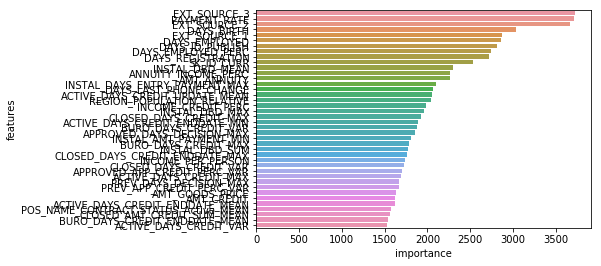

In [182]:

sns.barplot(x=top40['importance'], y=top40['features'])

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
# import fancyimpute as fi
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
df=pd.read_csv("FINALHOMECREDIT.csv")
y = df['TARGET']
X=df.drop(['TARGET'],axis=1)

In [4]:
print(X.shape)
print(y.shape)

(307507, 797)
(307507,)


In [5]:
X_train_later, X_test, y_train_later, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


In [6]:
folds=KFold(n_splits=10,shuffle=True,random_state=1001)
folds

KFold(n_splits=10, random_state=1001, shuffle=True)

In [7]:
# Create arrays and dataframes to store results
oof_preds = np.zeros(X_train_later.shape[0])
sub_preds = np.zeros(X_test.shape[0])
feature_importance_df = pd.DataFrame()

In [8]:
oof_preds.shape

(246005,)

In [9]:
sub_preds.shape

(61502,)

In [10]:
feats = [f for f in X_train_later.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
feats    

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APA

In [11]:
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train_later[feats], y_train_later)):
    print(n_fold,train_idx,valid_idx)
    print(len(valid_idx))
    print(len(train_idx))

0 [     0      1      3 ... 246002 246003 246004] [     2     39     46 ... 245979 245983 245994]
24601
221404
1 [     0      1      2 ... 246002 246003 246004] [     8     10     19 ... 245971 245982 245999]
24601
221404
2 [     0      1      2 ... 246002 246003 246004] [     5     25     36 ... 245988 245991 246000]
24601
221404
3 [     1      2      4 ... 246002 246003 246004] [     0      3      6 ... 245977 245985 245997]
24601
221404
4 [     0      1      2 ... 246001 246003 246004] [    13     14     15 ... 245957 245989 246002]
24601
221404
5 [     0      1      2 ... 246002 246003 246004] [     9     22     43 ... 245992 245995 245996]
24600
221405
6 [     0      1      2 ... 246001 246002 246004] [     4     20     33 ... 245987 245993 246003]
24600
221405
7 [     0      1      2 ... 246000 246002 246003] [    11     18     31 ... 245998 246001 246004]
24600
221405
8 [     0      2      3 ... 246002 246003 246004] [     1     21     24 ... 245970 245978 245980]
24600
221405
9

In [12]:
 for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train_later[feats], y_train_later)):
    train_x, train_y = X_train_later[feats].iloc[train_idx], y_train_later.iloc[train_idx]
    valid_x, valid_y = X_train_later[feats].iloc[valid_idx], y_train_later.iloc[valid_idx]
    clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )
    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)
    print("best iteration of clf is : ",clf.best_iteration_)
    oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
    sub_preds += clf.predict_proba(X_test[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    

Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.234088	training's auc: 0.800519	valid_1's binary_logloss: 0.244138	valid_1's auc: 0.770119
[400]	training's binary_logloss: 0.223443	training's auc: 0.825688	valid_1's binary_logloss: 0.240341	valid_1's auc: 0.779847
[600]	training's binary_logloss: 0.216754	training's auc: 0.841532	valid_1's binary_logloss: 0.239289	valid_1's auc: 0.782843
[800]	training's binary_logloss: 0.2111	training's auc: 0.854851	valid_1's binary_logloss: 0.238681	valid_1's auc: 0.784653
[1000]	training's binary_logloss: 0.205943	training's auc: 0.866688	valid_1's binary_logloss: 0.238397	valid_1's auc: 0.785546
[1200]	training's binary_logloss: 0.201206	training's auc: 0.877093	valid_1's binary_logloss: 0.238244	valid_1's auc: 0.786072
[1400]	training's binary_logloss: 0.196745	training's auc: 0.886689	valid_1's binary_logloss: 0.238255	valid_1's auc: 0.786204
Early stopping, best iteration is:
[1208]	training's b

best iteration of clf is :  1503
Fold  7 AUC : 0.799691
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.234292	training's auc: 0.800693	valid_1's binary_logloss: 0.240939	valid_1's auc: 0.774636
[400]	training's binary_logloss: 0.223862	training's auc: 0.825242	valid_1's binary_logloss: 0.237622	valid_1's auc: 0.782686
[600]	training's binary_logloss: 0.217086	training's auc: 0.841611	valid_1's binary_logloss: 0.236595	valid_1's auc: 0.785242
[800]	training's binary_logloss: 0.211383	training's auc: 0.855059	valid_1's binary_logloss: 0.236152	valid_1's auc: 0.7863
[1000]	training's binary_logloss: 0.206345	training's auc: 0.866533	valid_1's binary_logloss: 0.235912	valid_1's auc: 0.786952
[1200]	training's binary_logloss: 0.201485	training's auc: 0.877475	valid_1's binary_logloss: 0.235862	valid_1's auc: 0.786954
Early stopping, best iteration is:
[1136]	training's binary_logloss: 0.203029	training's auc: 0.87405	valid_1's binary_loglos

In [13]:
print('Full AUC score %.6f' % roc_auc_score(y_train_later, oof_preds))  

Full AUC score 0.788996


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


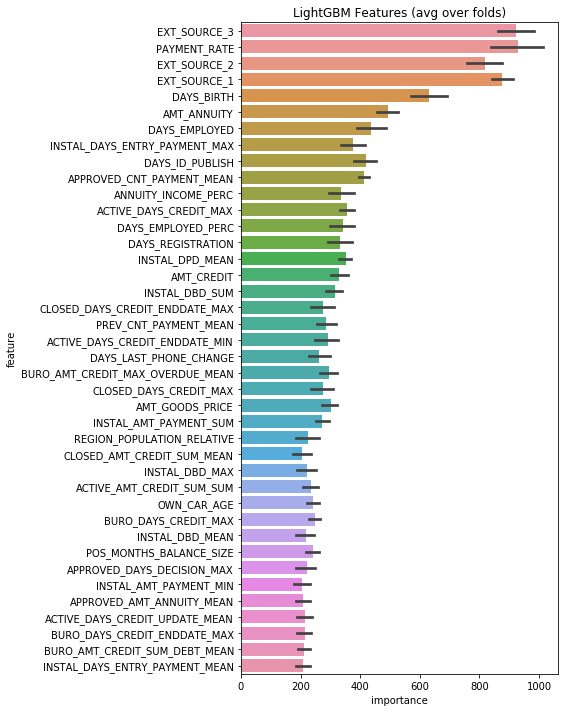

In [17]:
import seaborn as sns
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances01.png')

### Below goes code that was used to find best parameters for our model. It was executed on Kaggle Kernel and not here.

In [ ]:
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
X_train_later, X_test, y_train_later, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
print("Postive examples in train set: {}".format(np.sum(y_train_later==0)))
print("Negative examples in train set: {}".format(np.sum(y_train_later==1)))

print("Postive examples in test set: {}".format(np.sum(y_test==0)))
print("Negative examples in test set: {}".format(np.sum(y_test==1)))
X_train_later=X_train_later[0:50000]
y_train_later=y_train_later[0:50000]
print("Postive examples in train set: {}".format(np.sum(y_train_later==0)))
print("Negative examples in train set: {}".format(np.sum(y_train_later==1)))


In [ ]:
for n_estimators in range(100,3000,30):
    for learning_rate in np.arange(0.1,0.001,-0.05):
        for num_leaves in range(2,100,30):
            for subsample in np.arange(0.1,0.9,0.1):
                for max_depth in range(4,30,7):
                    for min_child_weight in range(0,5,1):
                        clf007 = LGBMClassifier(n_estimators=n_estimators,learning_rate=learning_rate,num_leaves=num_leaves,colsample_bytree=0.8,subsample=subsample,max_depth=max_depth,reg_alpha=0.1,reg_lambda=0.1,min_split_gain=0.01,min_child_weight=min_child_weight)
                        print("n_estimators=",n_estimators,"learning_rate=",learning_rate,"num_leaves=",num_leaves,"colsample_bytree=0.8,subsample",subsample,"max_depth=",max_depth,"reg_alpha=0.1,reg_lambda=0.1","min_split_gain=0.01","min_child_weight",min_child_weight)
                        clf007.fit(X_train_later,y_train_later)
                        y_pred=clf007.predict(X_test)
                        newdf=pd.DataFrame(data=y_pred)
                        newdf.iloc[:,0].value_counts()
                        print(classification_report(y_test, y_pred))
                        print(confusion_matrix(y_test, y_pred))

In [ ]:
clf007.fit(X_train_later,y_train_later)
y_pred=clf007.predict(X_test)

In [ ]:
newdf=pd.DataFrame(data=y_pred)
newdf.iloc[:,0].value_counts()
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)